# Inference Demo of RealBasicVSR
This is a quick inference demo of our paper ["Investigating Tradeoffs in Real-World Video Super-Resolution"](https://arxiv.org/pdf/2111.12704.pdf). Our RealBasicVSR is simple and easy to implement. Yet, it is strong through effectively aggregating long-term information in the videos. Here is an example from our paper.

<img src="https://user-images.githubusercontent.com/7676947/144365675-5c558a89-8b7f-4af9-a696-228bc73ab56e.png" width="100%">


## 1. Preparation

First, please make sure that you have **enabled GPU** in `Runtime->Change runtime type`. Then we will 1) install dependencies and 2) clone RealBasicVSR repository.

In [ ]:
# Install dependencies
!pip install openmim
!mim install mmcv-full
!pip install mmedit

# clone RealBasicVSR and download the pre-trained weights
!git clone https://github.com/ckkelvinchan/RealBasicVSR.git
%cd RealBasicVSR
!mkdir checkpoints
!wget https://www.dropbox.com/s/eufigxmmkv5woop/RealBasicVSR.pth?dl=0 -O checkpoints/RealBasicVSR_x4.pth

  Created wheel for openmim: filename=openmim-0.1.5-py2.py3-none-any.whl size=42502 sha256=7c5ba7eb48d6648ee6a36ef9218eef884531f1878725b47959ed200e0d49a62a
  Stored in directory: /root/.cache/pip/wheels/16/8b/e1/bdebbbc687aa50224a5ce46fe97a040a0c59f92b34bfc750b6
  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8219 sha256=0073eddb3318af8c0640e4d906607d2cf3e29bafebdc449c602fc4b13083aa77
  Stored in directory: /root/.cache/pip/wheels/73/2b/f6/26e9f84153c25050fe7c09e88f8e32a6be3c7034a38c418319
Successfully built openmim ordered-set
installing mmcv-full from wheel.
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 61.6 MB 5.5 MB/s 
     |████████████████████████████████| 185 kB 13.5 MB/s 
     |████████████████████████████████| 257 kB 12.1 MB/s 
  Created wheel for mmedit: filename=mmedit-0.11.0-py2.py3-none-any.whl size=509012 sha256=cdacaadd6e8a085160fd449853c560ddc3a56b1a04

## 2. Inference with Images as Inputs

2021-12-25 12:53:09,250 - mmedit - INFO - load checkpoint from torchvision path: torchvision://vgg19
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100% 548M/548M [00:08<00:00, 65.1MB/s]
load checkpoint from local path: checkpoints/RealBasicVSR_x4.pth
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
tcmalloc: large alloc 1371340800 bytes == 0x565141486000 @  0x7ff741d38b6b 0x7ff741d58379 0x7ff629e56cde 0x7ff629e58452 0x7ff67be7fcf3 0x7ff67bf07158 0x7ff67c5de49f 0x7ff67c5be870 0x7ff67c3a948a 0x7ff67bef829d 0x7ff67c6d7aca 0x7ff67c5ba70e 0x7ff67c17fd17 0x7ff67dae27c4 0x7ff67dae2c8d 0x7ff67c1f56e8 0x7ff67bef63d5 0x7ff67c75e970 0x7ff67c4ab069 0x7ff7252b7

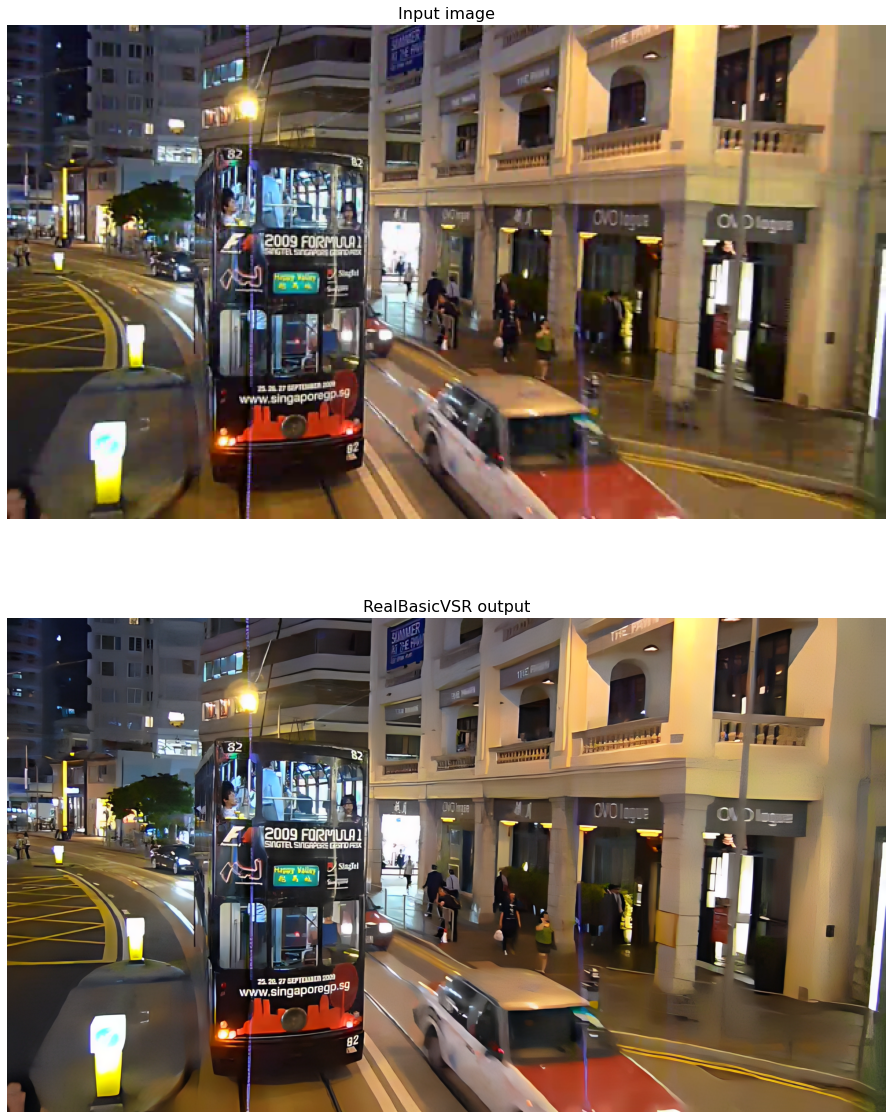

In [ ]:
# compute the results given 1) configuration file, 2) checkpoint, 3) input directory, and 4) output directory (it may take a while to run)
!python inference_realbasicvsr.py configs/realbasicvsr_x4.py checkpoints/RealBasicVSR_x4.pth data/demo_000 results/demo_000

# show the first image as an example
import mmcv
import matplotlib.pyplot as plt

img_input = mmcv.imread('data/demo_000/00000000.png', channel_order='rgb') 
img_output = mmcv.imread('results/demo_000/00000000.png', channel_order='rgb') 

fig = plt.figure(figsize=(25, 20))
ax1 = fig.add_subplot(2, 1, 1) 
plt.title('Input image', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(2, 1, 2)
plt.title('RealBasicVSR output', fontsize=16)
ax2.axis('off')
ax1.imshow(img_input)
ax2.imshow(img_output)


### 3. Inference with Videos as Inputs


In [ ]:
# compute the results given 1) configuration file, 2) checkpoint, 3) input path, and 4) output path (it may take a while to run)
# specify 'max_seq_len' if GPU memory is not enough
!python inference_realbasicvsr.py configs/realbasicvsr_x4.py checkpoints/RealBasicVSR_x4.pth data/demo_001.mp4 results/demo_001.mp4 --max_seq_len=20 --fps=12.5
# Your output video can be found in "results/demo_001.mp4"

2021-12-25 12:55:38,456 - mmedit - INFO - load checkpoint from torchvision path: torchvision://vgg19
load checkpoint from local path: checkpoints/RealBasicVSR_x4.pth
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
tcmalloc: large alloc 3317760000 bytes == 0x5626513b0000 @  0x7f52e6e96b6b 0x7f52e6eb6379 0x7f51cefb4cde 0x7f51cefb6452 0x7f5220fddcf3 0x7f5220fde867 0x7f5221331cc1 0x7f5221073571 0x7f5221073da5 0x7f522173fe52 0x7f52215dd1db 0x7f522107cebb 0x7f5221834b02 0x7f52212e8cbc 0x7f5222c473e1 0x7f5222c47af5 0x7f5221320dfe 0x7f52ca782b2e 0x56251a9b5544 0x56251a9b5240 0x56251aa29627 0x56251a9b6afa 0x56251aa24915 0x56251aa239ee 0x56251aa236f3 0x56251aaed4c2 0x56251aaed83d 0x56251aaed6e6 0x56251aac5163 0x56251aac4e0c 0x7f52e5c9eb